In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

to_categorical metodu one hot encoding yapmaktadır.

<br>
<img src="m1.png" align = "left" style="width:500px;height:200px"/> Yan tarafta one hot encoding kavramını ifade eden bir görsel bulunmaktadır. Üzerinde 6 ifadesinin bulundupu bir resim vardır. Bu resmin sayısal karşılığı olan bir vektör vardır. Ve bir label değeri vardır. Label değeri 6'dır. Bu resmi keras'ta eğitebilmek için gerekli olan şey 6 label'ı değildir. 6 label'ını one hot encoding ile çevirmeliyiz. Kaç tane class var ise her bir class'a ait bir yer vardır. O resim hangi class'a ait ise ilgili değere ait yer 1 olur. Görselde gördüğünüz üzere label değeri 6 olduğu için 6 değerine karşılık gelen yer 1'dir. Diğer yerler 0'dır. Bu sayede label'lar one hot encoding metodu ile keras'ın anlayabileceği şekle çevrilmiştir.

<br>
<img src="m2.png" align = "left" style="width:500px;height:200px"/>  
A, B, C şeklinde 3 adet sınıf olsun. Bu sınıflara karşılık gelen resimler var. Bunları keras'a label olarak verebilmek için bunlara one hot encoding yapılır. Yanda sınıfların encode edilmiş hallerini görmektesiniz. Bu yapıya getirildiğinde keras label'ları anlayabilir hale geliyor. One hot encoding işleminin gerçekleştirilebilmesi için to_categorical metodu vardır.

In [2]:
def load_and_preprocess(data_path):
    data = pd.read_csv(data_path)
    data = data.values  #data, array'e çevrilmiştir.
    np.random.shuffle(data)  
    
    x = data[:,1:].reshape(-1,28,28,1)/255.0
    y = data[:,0].astype(np.int32)
    y = to_categorical(y, num_classes = len(set(y)))
    
    return x,y

train_data_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM/Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/Mnist_dataset_with_CNN/mnist_train.csv"
test_data_path = "C:/Users/raziy/OneDrive/Masaüstü/Caner hocanın attıkları/KURS ÇALIŞMALARIM\Deep Learning ve Python İleri Seviye Derin Öğrenme (5.1)/Mnist_dataset_with_CNN/mnist_test.csv"

x_train, y_train = load_and_preprocess(train_data_path)
x_test, y_test = load_and_preprocess(test_data_path)

In [3]:
y_train.shape

(60000, 10)

np.random.shuffle(data) satırı ile data kendi içerisinde karıştırılmıştır. 

x değişkeninde resimler, y değişkeninde label'lar tutulmaktadır.

x = data[:,1:].reshape(-1,28,28,1)/255.0 satırında keras (-1,28,28,1) şeklini kabul ettiği için bu şekle dönüşüm sağlanmıştır. 255.0'a bölerek resim normalize edilmiştir.

y = data[:,0].astype(np.int32) satırı ile y'nin int'e çevrilmesi sağlanmıştır. Belki y zaten int'ti buna bakmadık ve her ihtimale karşı int'e çevirdik. Yani mesela label "1" şeklinde string olabilirdi dolayısıyla bunu 1 şeklinde int'e çevirdik.

Y = to_categorical(y, num_classes = len(set(y))) satırında to_categorical metodu kullanılarak one hot encoding işlemi yapılmıştır.

Şimdi de bir resmi görselleştirelim.

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


60000 tane train data'sı ve 10000 tane test data'sı vardır.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


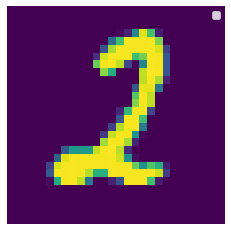

2


In [5]:
#visualize
index=5
vis = x_train.reshape(60000,28,28)
plt.imshow(vis[index,:,:])
plt.legend()
plt.axis("off")
plt.show()
print(np.argmax(y_train[index]))

x_train'in shape'i (60000, 28, 28, 1) şeklindedir. Default olarak 4.parametrede 1 vardır. Görselleştirme yaparken bu 1 değerine ihtiyaç yoktur. Dolayısıyla vis = x_train.reshape(60000,28,28) satırı ile 1 değeri kaldırılır.

index değeri rastgele seçilmiştir ve görselleştirme yapılmıştır.

Veri setinde 0,1,2,3,4,5,6,7,8,9 değerleri vardır. Dolayısıyla çıktı resminde bu değerlerden birisi elde edilecektir.

In [11]:
#CNN
numberOfClass = y_train.shape[1]   #kaç tane class olduğunu anlamak içindir.

model = Sequential()

model.add(Conv2D(input_shape = (28,28,1), filters = 16, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size = (3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(units=256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units=numberOfClass))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

hist = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=50, batch_size=4000)

Epoch 1/50
15/15 [==============================] - 23s 1s/step - loss: 1.6214 - accuracy: 0.4716 - val_loss: 2.1218 - val_accuracy: 0.3532
Epoch 2/50
15/15 [==============================] - 22s 1s/step - loss: 0.6536 - accuracy: 0.7961 - val_loss: 2.3864 - val_accuracy: 0.1135
Epoch 3/50
15/15 [==============================] - 22s 1s/step - loss: 0.3784 - accuracy: 0.8813 - val_loss: 3.0686 - val_accuracy: 0.1135
Epoch 4/50
15/15 [==============================] - 21s 1s/step - loss: 0.2757 - accuracy: 0.9132 - val_loss: 3.6920 - val_accuracy: 0.1135
Epoch 5/50
15/15 [==============================] - 22s 1s/step - loss: 0.2276 - accuracy: 0.9292 - val_loss: 4.1357 - val_accuracy: 0.1135
Epoch 6/50
15/15 [==============================] - 23s 2s/step - loss: 0.1957 - accuracy: 0.9400 - val_loss: 4.4388 - val_accuracy: 0.1135
Epoch 7/50
15/15 [==============================] - 23s 2s/step - loss: 0.1714 - accuracy: 0.9465 - val_loss: 4.7965 - val_accuracy: 0.1135
Epoch 8/50
15/15 [==

Modeli kaydedelim.

In [12]:
model.save_weights("cnn_mnist_model.h5")

Modeli görselleştirelim.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


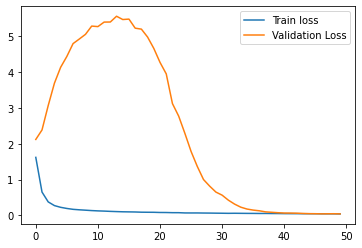

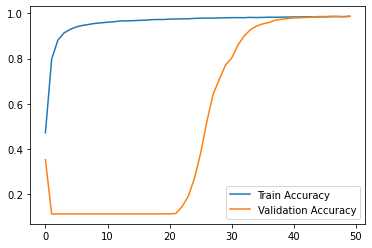

In [13]:
print(hist.history.keys())
plt.plot(hist.history["loss"], label="Train loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [14]:
#save history
import json
with open('cnn_mnist_hist.json','w') as f:
    json.dump(hist.history, f)

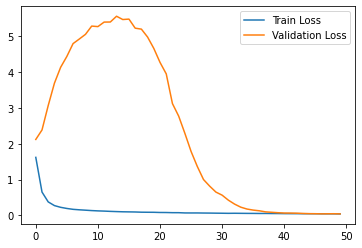

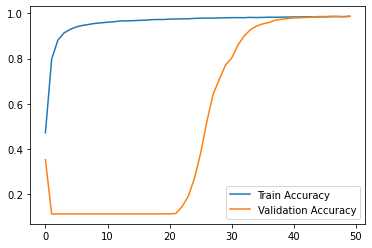

In [15]:
#load history
import codecs
with codecs.open("cnn_mnist_hist.json", 'r', encoding='utf-8') as f:
    h = json.loads(f.read())
    
plt.figure()
plt.plot(h["loss"], label="Train Loss")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label="Train Accuracy")
plt.plot(h["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()